In [1]:
import pandas as pd

# Read File

In [ ]:
df_cahaya_aktual = pd.read_csv('../data/preprocessing/prepro_cahaya_aktual.csv')
df_cahaya_doa = pd.read_csv('../data/preprocessing/prepro_cahaya_doa_dan_niat.csv')
df_jagat_literasi = pd.read_csv('../data/preprocessing/prepro_jagat_literasi.csv')
df_jeo = pd.read_csv('../data/preprocessing/prepro_jeo.csv')
df_katanetizen = pd.read_csv('../data/preprocessing/prepro_katanetizen.csv')
df_kolom = pd.read_csv('../data/preprocessing/prepro_kolom.csv')
df_tren = pd.read_csv('../data/preprocessing/prepro_tren.csv')
df_warta = pd.read_csv('../data/preprocessing/prepro_warta.csv')

df_bola = pd.read_csv('../data/preprocessing/kompas_bola_cleaned.csv')
df_edukasi = pd.read_csv('../data/preprocessing/kompas_edukasi_cleaned.csv')
df_lestari = pd.read_csv('../data/preprocessing/kompas_lestari_clean.csv')
df_lifestyle = pd.read_csv('../data/preprocessing/kompas_lifestyle_cleaned.csv')
df_money = pd.read_csv('../data/preprocessing/kompas_money_cleaned.csv')
df_news = pd.read_csv('../data/preprocessing/kompas_news_cleaned.csv')
df_nusaraya = pd.read_csv('../data/preprocessing/kompas_nusaraya_cleaned.csv')
df_otomotif = pd.read_csv('../data/preprocessing/kompas_otomotif_cleaned.csv')
df_parapuan = pd.read_csv('../data/preprocessing/kompas_parapuan_cleaned.csv')
df_properti = pd.read_csv('../data/preprocessing/kompas_properti_cleaned.csv')
df_sains = pd.read_csv('../data/preprocessing/kompas_sains_cleaned.csv')
df_tekno = pd.read_csv('../data/preprocessing/kompas_tekno_cleaned.csv')
df_travel = pd.read_csv('../data/preprocessing/kompas_travel_cleaned.csv')

# Duplikat

In [38]:
df_all = pd.concat([
    df_cahaya_aktual, df_cahaya_doa, df_jagat_literasi, df_jeo, df_katanetizen, df_kolom, df_tren, df_warta,
    df_bola, df_edukasi, df_lestari, df_lifestyle, df_money, df_news, df_nusaraya,
    df_otomotif, df_parapuan, df_properti, df_regional, df_sains, df_tekno, df_travel
], ignore_index=True)

print(f"Total data: {len(df_all):,}")

if 'url' not in df_all.columns:
    raise KeyError("Terdapat dataframe yang tidak memiliki kolom url")

df_duplikat = df_all[df_all.duplicated(subset='url', keep=False)]

print(f"Jumlah duplikat url: {df_duplikat['url'].nunique():,}")
print(df_duplikat.head())

duplikat_detail = (
    df_duplikat.groupby('url')
    .size()
    .reset_index(name='jumlah_kemunculan')
    .sort_values('jumlah_kemunculan', ascending=False)
)

print("\nURL yang muncul di lebih dari satu dataset:")
print(duplikat_detail.head(10))


Total data: 10,929
Jumlah duplikat url: 5
                                                    url category  \
1164  http://www.kompas.com/edu/read/2025/11/07/0818...      Edu   
3178  https://www.kompas.com/tren/read/2025/11/11/09...   Kompas   
3187  https://www.kompas.com/tren/read/2025/11/11/07...   Kompas   
3253  https://bola.kompas.com/read/2025/11/11/065340...     Bola   
3272  https://money.kompas.com/read/2019/08/01/12421...     Bola   

           subcategory              tanggal_publish  \
1164               Edu   7 November 2025, 08:18 WIB   
3178              Tren  11 November 2025, 09:30 WIB   
3187              Tren  11 November 2025, 07:00 WIB   
3253  Timnas Indonesia          2025-11-11 06:53:40   
3272  Timnas Indonesia          2019-08-01 12:42:15   

                                           judul_berita  \
1164  Ketika Universitas Terbaik Menolak Pemeringkat...   
3178  PM Jepang Sanae Takaichi Ingin Pangkas Gaji Se...   
3187  Fenomena Unik Warga Jepang Mengadop

In [39]:
datasets = {
    'Cahaya Aktual': df_cahaya_aktual,
    'Cahaya Doa & Niat': df_cahaya_doa,
    'Jagat Literasi': df_jagat_literasi,
    'JEO': df_jeo,
    'Kata Netizen': df_katanetizen,
    'Kolom': df_kolom,
    'Tren': df_tren,
    'Warta': df_warta,
    'Bola': df_bola,
    'Edukasi': df_edukasi,
    'Lestari': df_lestari,
    'Lifestyle': df_lifestyle,
    'Money': df_money,
    'News': df_news,
    'Nusaraya': df_nusaraya,
    'Otomotif': df_otomotif,
    'Parapuan': df_parapuan,
    'Properti': df_properti,
    'Sains': df_sains,
    'Tekno': df_tekno,
    'Travel': df_travel,
}

for name, df in datasets.items():
    df['source'] = name

df_all = pd.concat(datasets.values(), ignore_index=True)

df_clean = df_all.drop_duplicates(subset='url', keep='first').reset_index(drop=True)

print(f"Total sebelum bersih: {len(df_all):,}")
print(f"Total sesudah bersih: {len(df_clean):,}")
print(f"Total duplikat dihapus: {len(df_all) - len(df_clean):,}")

cleaned_datasets = {
    name: df_clean[df_clean['source'] == name].reset_index(drop=True)
    for name in datasets.keys()
}

Total sebelum bersih: 10,926
Total sesudah bersih: 10,912
Total duplikat dihapus: 14


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              10912 non-null  object
 1   category         10912 non-null  object
 2   subcategory      10816 non-null  object
 3   tanggal_publish  10903 non-null  object
 4   judul_berita     10912 non-null  object
 5   tags             10393 non-null  object
 6   konten_berita    10912 non-null  object
 7   source           10912 non-null  object
 8   summary          499 non-null    object
 9   __source_file    901 non-null    object
dtypes: object(10)
memory usage: 852.6+ KB


# Distribusi Berita

In [41]:
import matplotlib.pyplot as plt

## Distribusi Berita Tiap Kategori

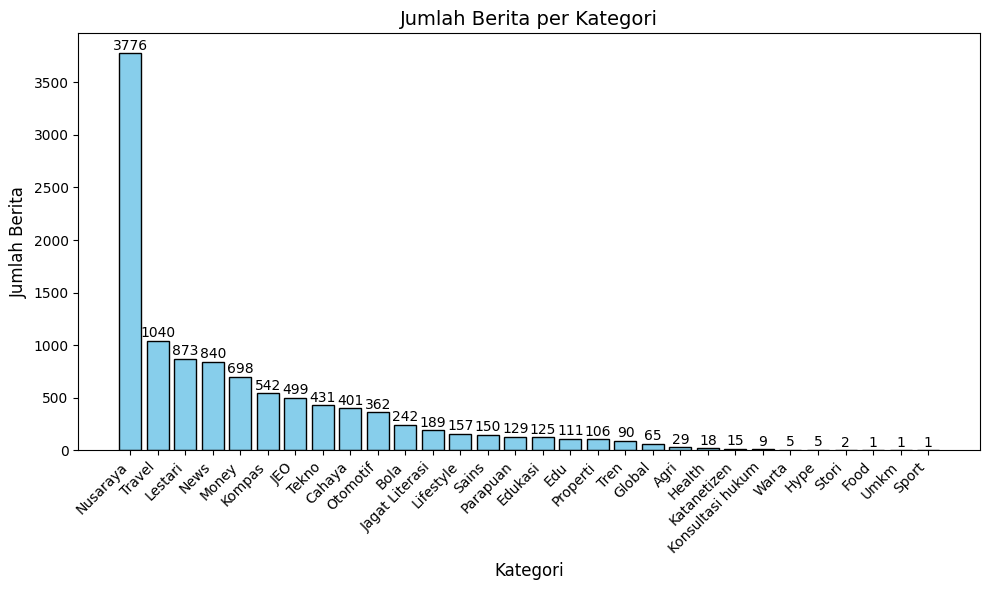

In [42]:
df_jumlah = df_clean['category'].value_counts().reset_index()
df_jumlah.columns = ['Kategori', 'Jumlah Berita']

plt.figure(figsize=(10,6))
bars = plt.bar(df_jumlah['Kategori'], df_jumlah['Jumlah Berita'], 
               color='skyblue', edgecolor='black')

plt.title('Jumlah Berita per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Berita', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 5,
        f'{int(yval)}',
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

### Perbaiki Kategori Berita

In [43]:
df_clean_fixed = df_clean.copy()

kategori_target = [
    'Agri', 'Food', 'Global', 'Hype', 'Kompas',
    'Konsultasi hukum', 'Regional', 'Sport', 'Stori', 'Umkm', 'Edu'
]

mask_target = df_clean_fixed['category'].isin(kategori_target)

mask_kompas = mask_target & (df_clean_fixed['category'] == 'Kompas')

mask_non_kompas_in_target = mask_target & (df_clean_fixed['category'] != 'Kompas')

df_clean_fixed.loc[mask_non_kompas_in_target, 'subcategory'] = (
    df_clean_fixed.loc[mask_non_kompas_in_target, 'category']
)
df_clean_fixed.loc[mask_non_kompas_in_target, 'category'] = (
    df_clean_fixed.loc[mask_non_kompas_in_target, 'source']
)

df_clean_fixed.loc[mask_kompas, 'category'] = df_clean_fixed.loc[mask_kompas, 'source']


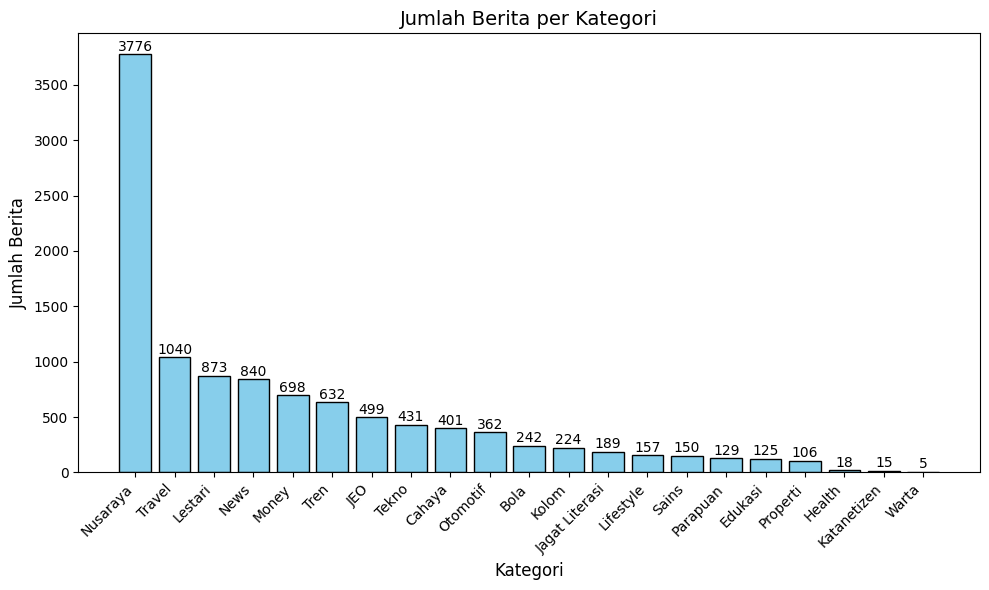

In [44]:
df_jumlah = df_clean_fixed['category'].value_counts().reset_index()
df_jumlah.columns = ['Kategori', 'Jumlah Berita']

plt.figure(figsize=(10,6))
bars = plt.bar(df_jumlah['Kategori'], df_jumlah['Jumlah Berita'], 
               color='skyblue', edgecolor='black')

plt.title('Jumlah Berita per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Berita', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 5,
        f'{int(yval)}',
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

## Distribusi Berita Tiap Sub Kategori

In [45]:
# periksa subcategory setiap category
df_kategori_summary = (
    df_clean_fixed.groupby('category')['subcategory']
    .agg([
        ('Jumlah Subkategori', lambda x: x.nunique()),
        ('Daftar Subkategori', lambda x: ', '.join(sorted(x.dropna().unique())))
    ])
    .reset_index()
)

df_kategori_summary.head(21)


,category,Jumlah Subkategori,Daftar Subkategori
0,Bola,11,"Badminton, Indeks, Internasional, Liga Champio..."
1,Cahaya,2,"Aktual, Doa dan Niat"
2,Edukasi,8,"Beasiswa, Edu News, IdeAksi, Literasi, Pendidi..."
3,Health,1,Health
4,JEO,4,"Cerita Data, Insight, Peristiwa, Tokoh"
5,Jagat Literasi,17,"Bandung, Denpasar, Edu, Fashion, Makassar, Med..."
6,Katanetizen,1,Kata Netizen
7,Kolom,9,"Agri, Edu, Food, Global, Hype, Konsultasi huku..."
8,Lestari,4,"BUMN, LSM/Figur, Pemerintah, Swasta"
9,Lifestyle,8,"Beauty & Grooming, Buku, Fashion, Kilas Lifest..."


Note:
- Berdasarkan jumlah sub kategori, masih wajar untuk divisualisasikan dengan barchart

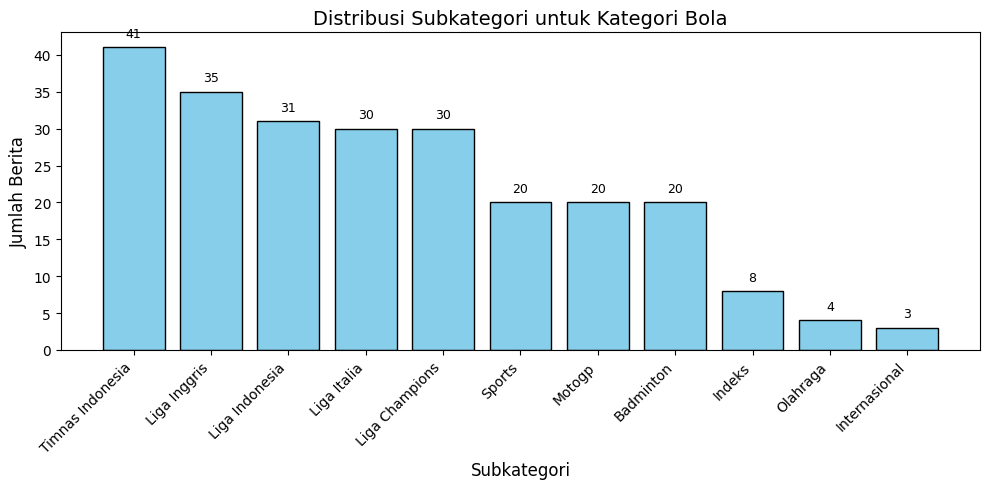

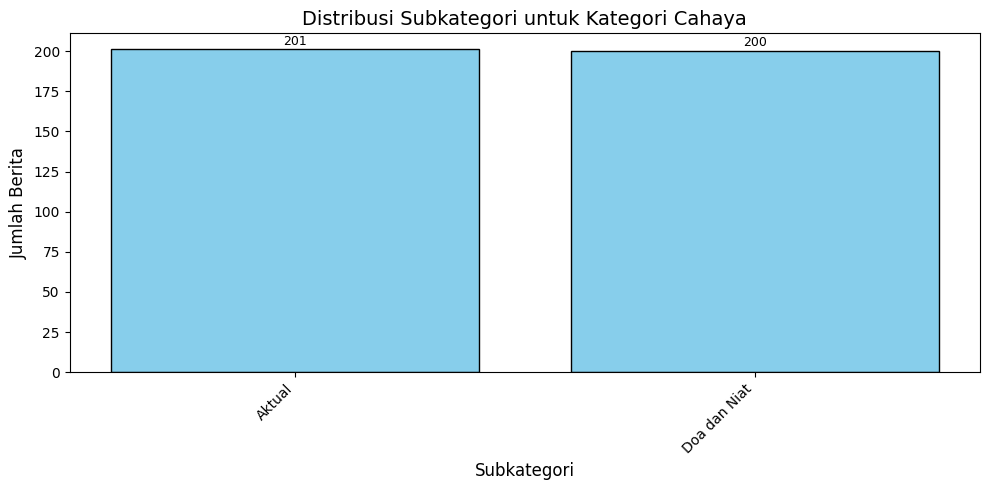

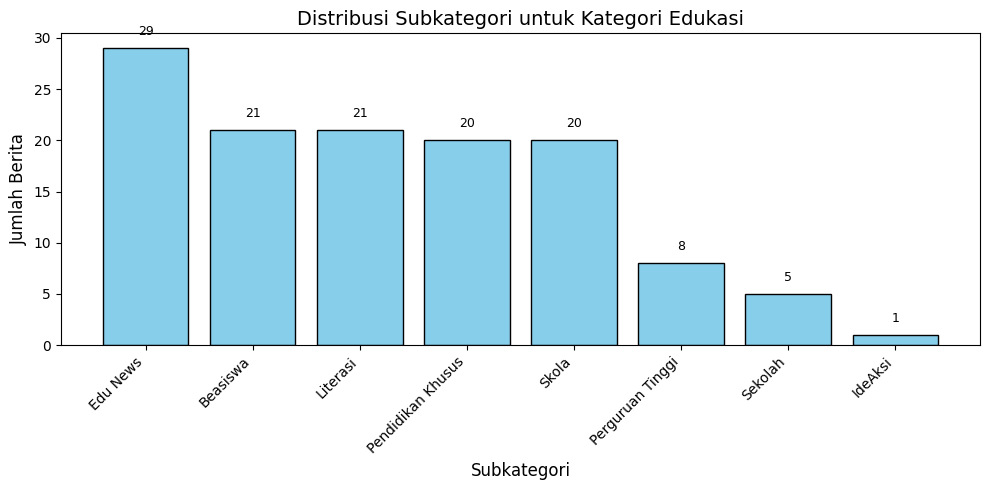

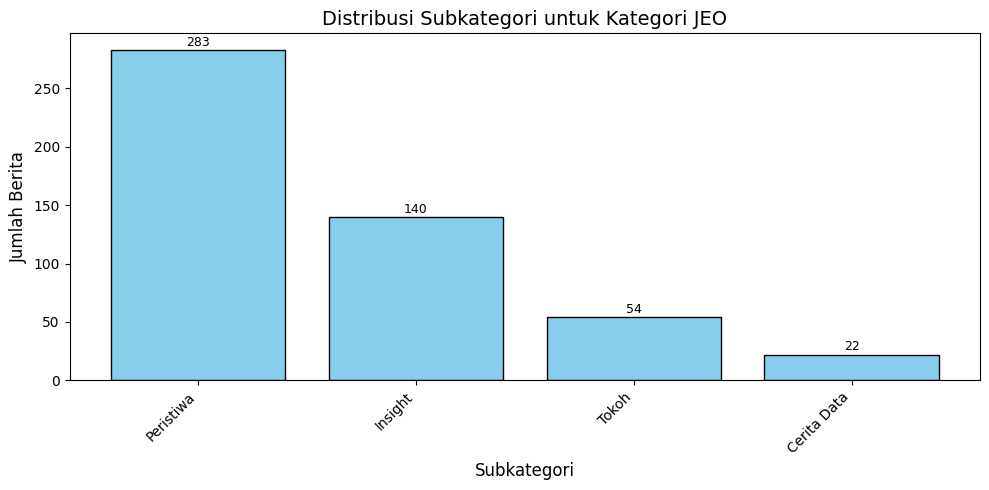

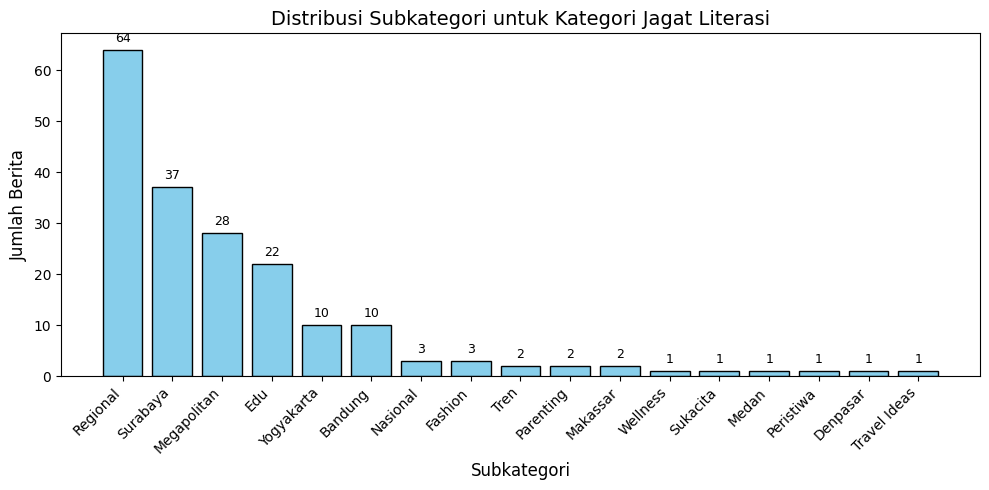

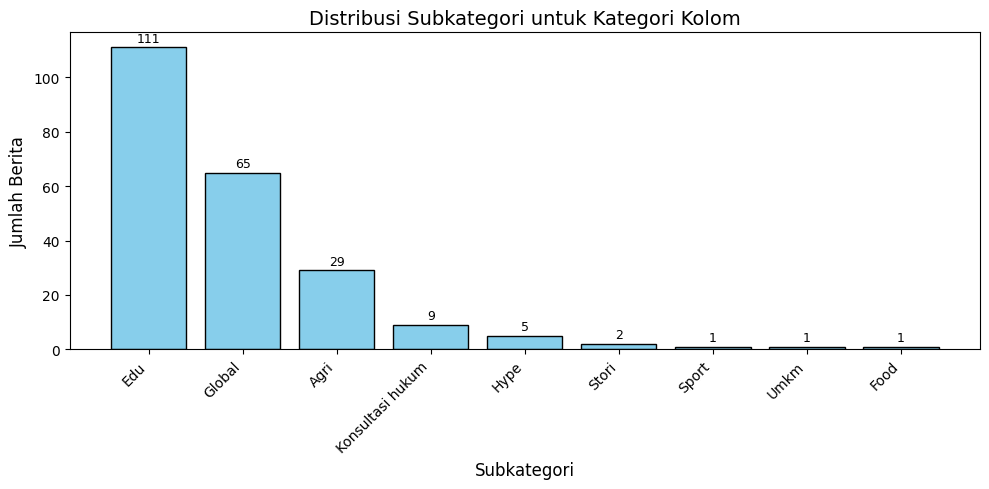

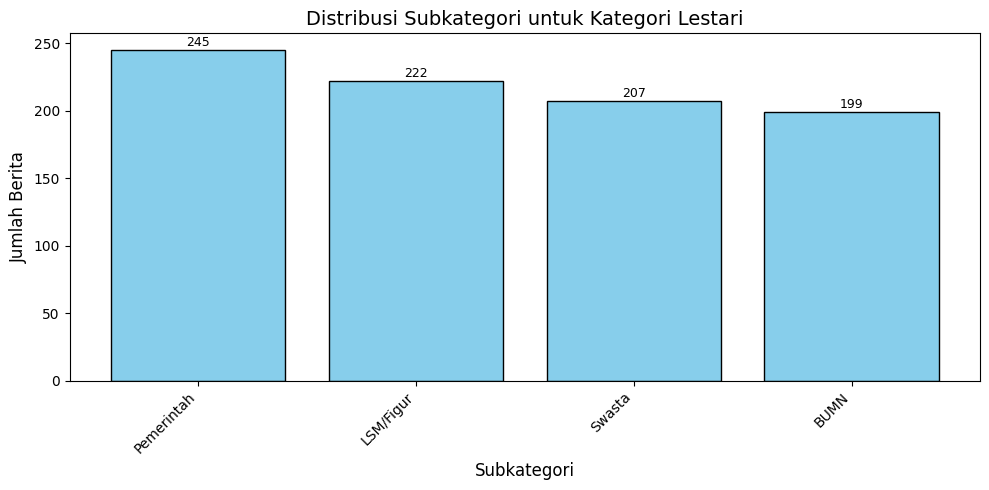

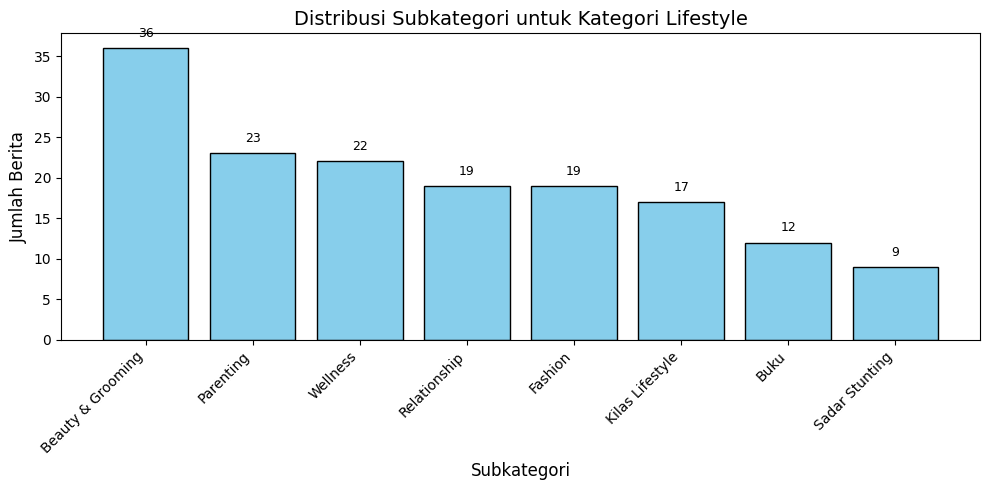

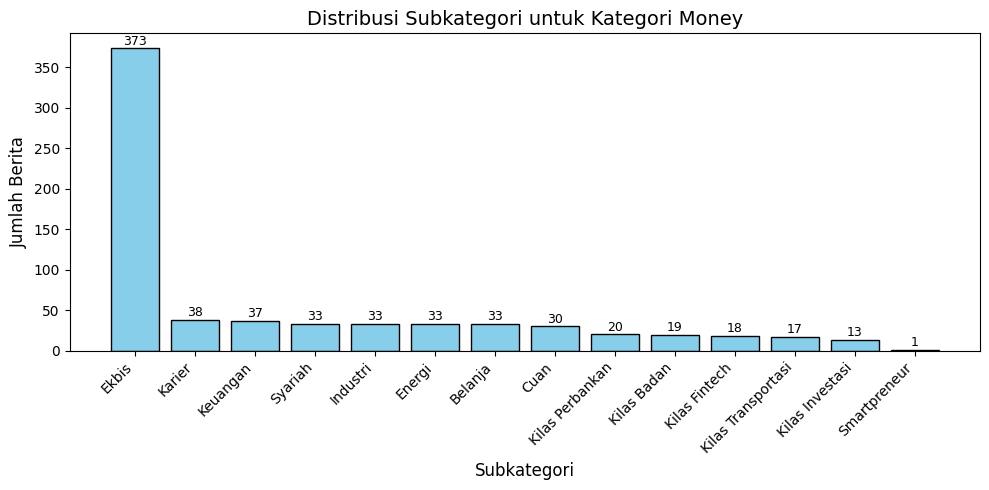

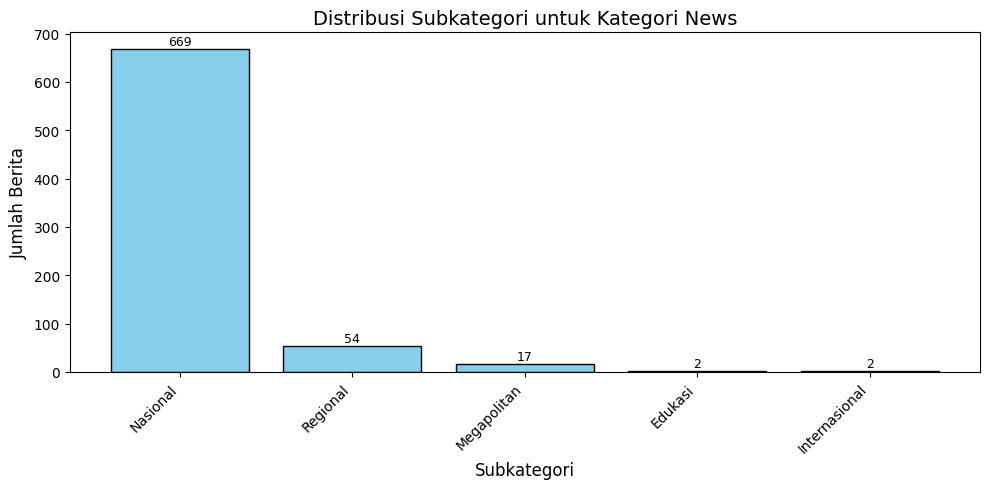

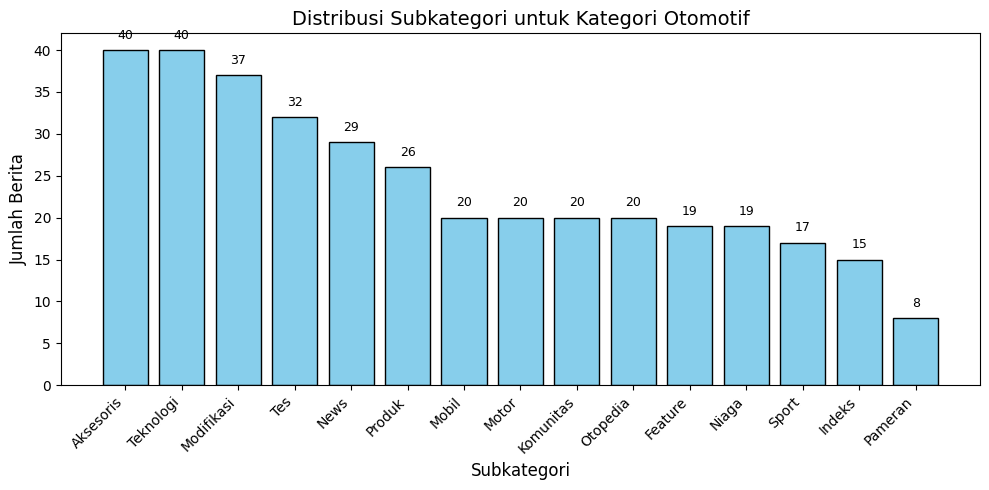

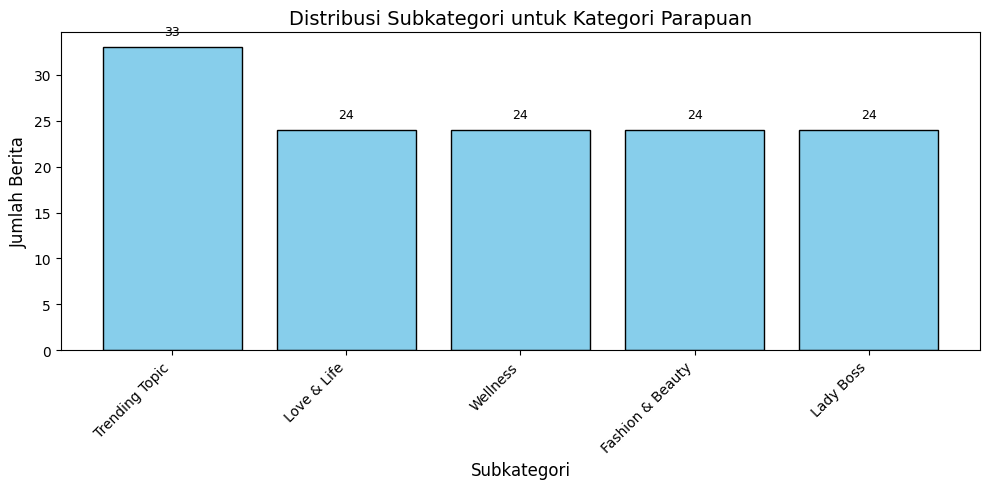

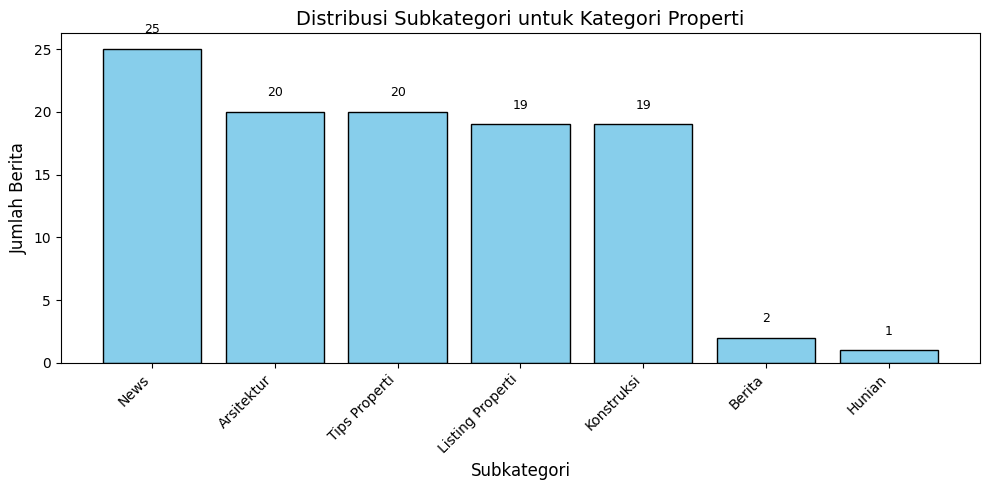

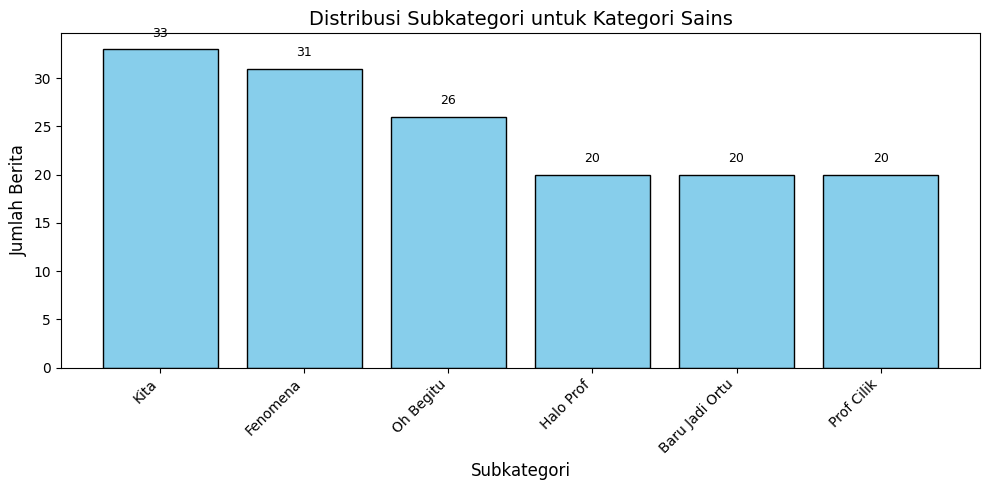

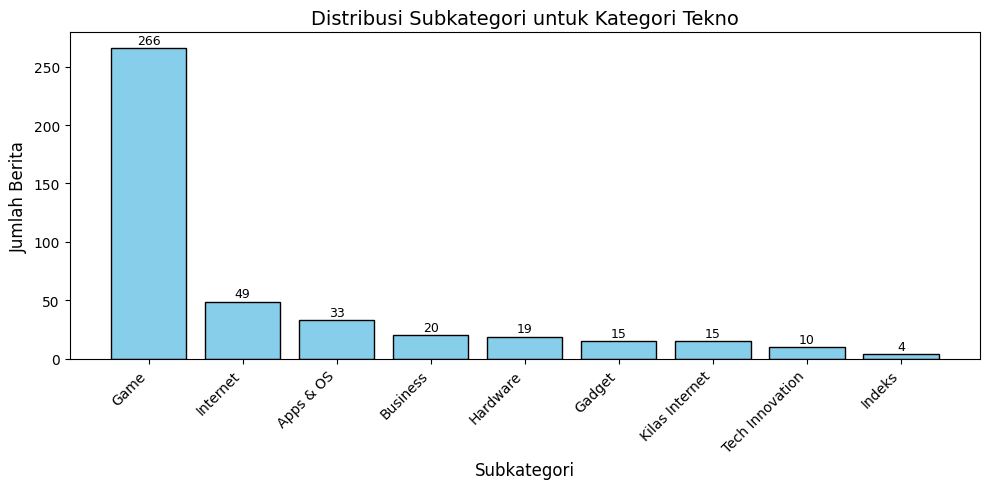

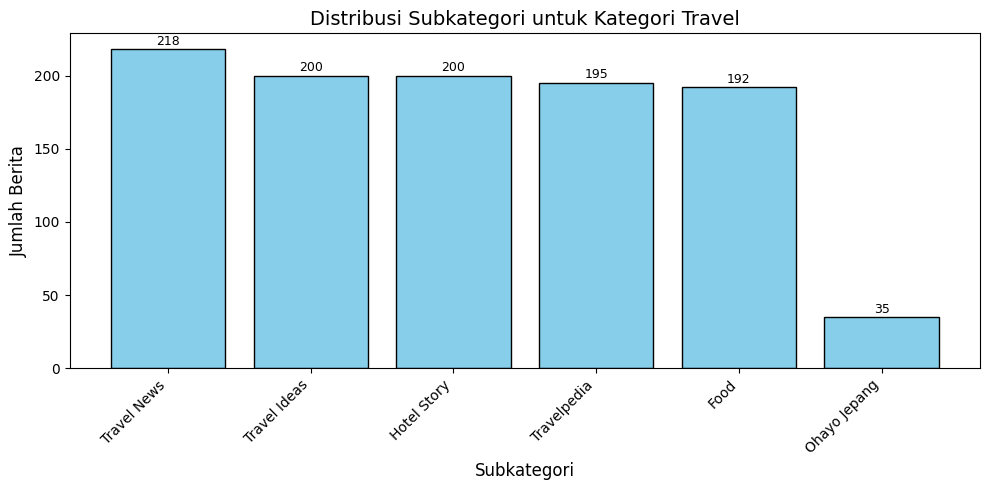

In [48]:
# hanya untuk kategori dengan jumlah subkategori lebih dari 1
kategori_multi = df_kategori_summary[df_kategori_summary['Jumlah Subkategori'] > 1]['category']

for kategori in kategori_multi:
    df_subset = df_clean_fixed[df_clean_fixed['category'] == kategori]
    df_subcount = df_subset['subcategory'].value_counts().reset_index()
    df_subcount.columns = ['Subkategori', 'Jumlah Berita']
    
    plt.figure(figsize=(10,5))
    bars = plt.bar(df_subcount['Subkategori'], df_subcount['Jumlah Berita'], 
                   color='skyblue', edgecolor='black')
    
    plt.title(f'Distribusi Subkategori untuk Kategori {kategori}', fontsize=14)
    plt.xlabel('Subkategori', fontsize=12)
    plt.ylabel('Jumlah Berita', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            yval + 1,
            f'{int(yval)}',
            ha='center', va='bottom', fontsize=9
        )
    
    plt.tight_layout()
    plt.show()


# Distribusi Kalimat

In [49]:
# kalimat dipisah dengan .
def hitung_jumlah_kalimat(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == '':
        return 0
    kalimat = [kal.strip() for kal in text.split('.') if kal.strip() != '']
    return len(kalimat)

df_clean_fixed['jumlah_kalimat'] = df_clean_fixed['konten_berita'].apply(hitung_jumlah_kalimat)

df_median = (
    df_clean_fixed.groupby('category')['jumlah_kalimat']
    .median()
    .reset_index()
    .rename(columns={'jumlah_kalimat': 'Median Jumlah Kalimat'})
)

df_median = df_median.sort_values('Median Jumlah Kalimat', ascending=False)


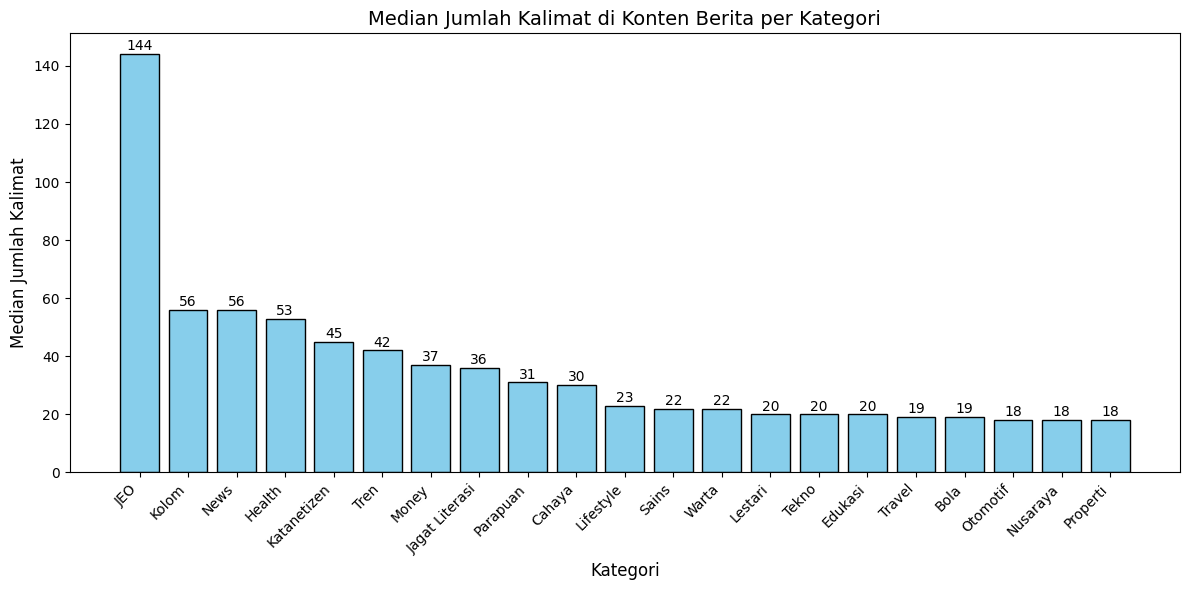

In [50]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_median['category'], df_median['Median Jumlah Kalimat'], 
               color='skyblue', edgecolor='black')

plt.title('Median Jumlah Kalimat di Konten Berita per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Median Jumlah Kalimat', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.3,
        f'{int(yval)}',
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

# Save Hasil Analisis

In [51]:
df_clean_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              10912 non-null  object
 1   category         10912 non-null  object
 2   subcategory      10816 non-null  object
 3   tanggal_publish  10903 non-null  object
 4   judul_berita     10912 non-null  object
 5   tags             10393 non-null  object
 6   konten_berita    10912 non-null  object
 7   source           10912 non-null  object
 8   summary          499 non-null    object
 9   __source_file    901 non-null    object
 10  jumlah_kalimat   10912 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 937.9+ KB


Note:
- Hapus kolom summary, __source_file

In [52]:
df_clean_fixed = df_clean_fixed.drop(columns=['summary', '__source_file'])
df_clean_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              10912 non-null  object
 1   category         10912 non-null  object
 2   subcategory      10816 non-null  object
 3   tanggal_publish  10903 non-null  object
 4   judul_berita     10912 non-null  object
 5   tags             10393 non-null  object
 6   konten_berita    10912 non-null  object
 7   source           10912 non-null  object
 8   jumlah_kalimat   10912 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 767.4+ KB


In [55]:
total_kalimat = df_clean_fixed['jumlah_kalimat'].sum()
print(f"Total jumlah kalimat dari semua berita: {total_kalimat}")

Total jumlah kalimat dari semua berita: 372213


In [54]:
df_clean_fixed.to_csv('../data/analisis/hasil_analisis.csv')

# Dataset IndoNLU

In [57]:
with open('../data/indoNlu/train.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

jumlah_kalimat = 0

ada_isi = False

for line in lines:
    if line.strip():
        ada_isi = True
    else:
        if ada_isi:
            jumlah_kalimat += 1
            ada_isi = False

if ada_isi:
    jumlah_kalimat += 1

print(f"Jumlah kalimat dataset IndoNLU: {jumlah_kalimat}")


Jumlah kalimat dataset IndoNLU: 6720
